# Customer Churn for SyriaTel 

Author: Monique Hercules 
***

## Overview 

SyriaTel is a telecommuncations phone company. 

We shall predict whether or not a customer will leave the SyriaTel communication company based on various factors to detect the churn rate of the customers. 

## Business Problem 

SyriaTel is trying to reduce the amount of churn customers.Through predictive modeling we will determine the factors producing the customers to churn and come up with practical solutions based on the customers needs to keep them retained. 

Customer churn rate prediction is used to determine the tendency at which customers cancel there subscription or service they have been using and discontinue from being a client of that company. The customer churn rate is a percentage of the churned customers within a specified time interval. 

The churn rate for this dataset will be 9 months. 



We will be determining what factors are increasing the churn to produce practical resolutions to the problem. With the use of of a churn prediction model we will be able to determining the factors and propose solutions to them. 

The Following Factors are what we will base our analysis upon:

    1. State
    2. Account Length  
    3. Area Code 
    4. Phone Number 
    5. International Plan 
    6. Voice Mail Plan
    7. Number of Voice Messages 
    8. Total Day Minutes 
    9. Total Day Calls 
    10. Total Day Charge 
    11. Total Eve Minutes 
    12. Total Eve Calls 
    13. Total Eve Charge 
    14. Total Night Minutes 
    15. Total Night Calls 
    16. Total Night Charge 
    17. Total International Minutes 
    18. Total International Calls 
    19. Total International Charge 
    20. Customer Service Calls 
    21. Churn
    

## Data Understanding 

### Import Libraries & Load Dataset 

In [3]:
#Importing Libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import scipy.stats as stats 
%matplotlib inline 
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn. preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

#Loading the data 
df = pd.read_csv('churn_dataset.csv')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

May drop phone number since i can't see how it would be useful in figuring out the churn rate. 


Exploring the Dataset 

In [1]:
df.info()

NameError: name 'df' is not defined

In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [5]:
#Checking for null values 
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

wow there is no nulls how interesting this is either a really clean dataset or something fishy is happening

In [6]:
df.shape

(3333, 21)

In [7]:
#Only including potential predictors as independent variables for churn factors 


In [8]:
#Dropping Irrelevant Columns 
df = df.drop(columns=['phone number','state'])
df.head()


account length  area code international plan voice mail plan  \
0             128        415                 no             yes   
1             107        415                 no             yes   
2             137        415                 no              no   
3              84        408                yes              no   
4              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

## Preprocessing 

One Hot Encoding 

One Hot Encoding the chosen categorical variables 

In [9]:
int_plan_dummy = pd.get_dummies(df['international plan'], prefix='int_plan', drop_first=True)

voicemail_plan_dummy = pd.get_dummies(df['voice mail plan'], prefix='voicemail', drop_first=True)



In [10]:
df = df.drop(['international plan','voice mail plan'], axis =1)

In [12]:
df_final = pd.concat([df,int_plan_dummy, voicemail_plan_dummy], axis =1)
df_final.head()

account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total eve charge  total night minutes  total night calls  \
0             16.78                244.7                 91   
1             16.62                254.4                103   
2             10.30                162.6                104   
3              5.26                196.9                 89   
4             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  int_plan_yes  \
0               2.70                       1  False             0   
1               3.70                       1  False             0   
2               3.29                       0  False             0   
3               1.78                       2  False             1   
4               2.73                       3  False             1   

   voicemail_yes  
0              1  
1              1  
2              0  
3              0  
4              0

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


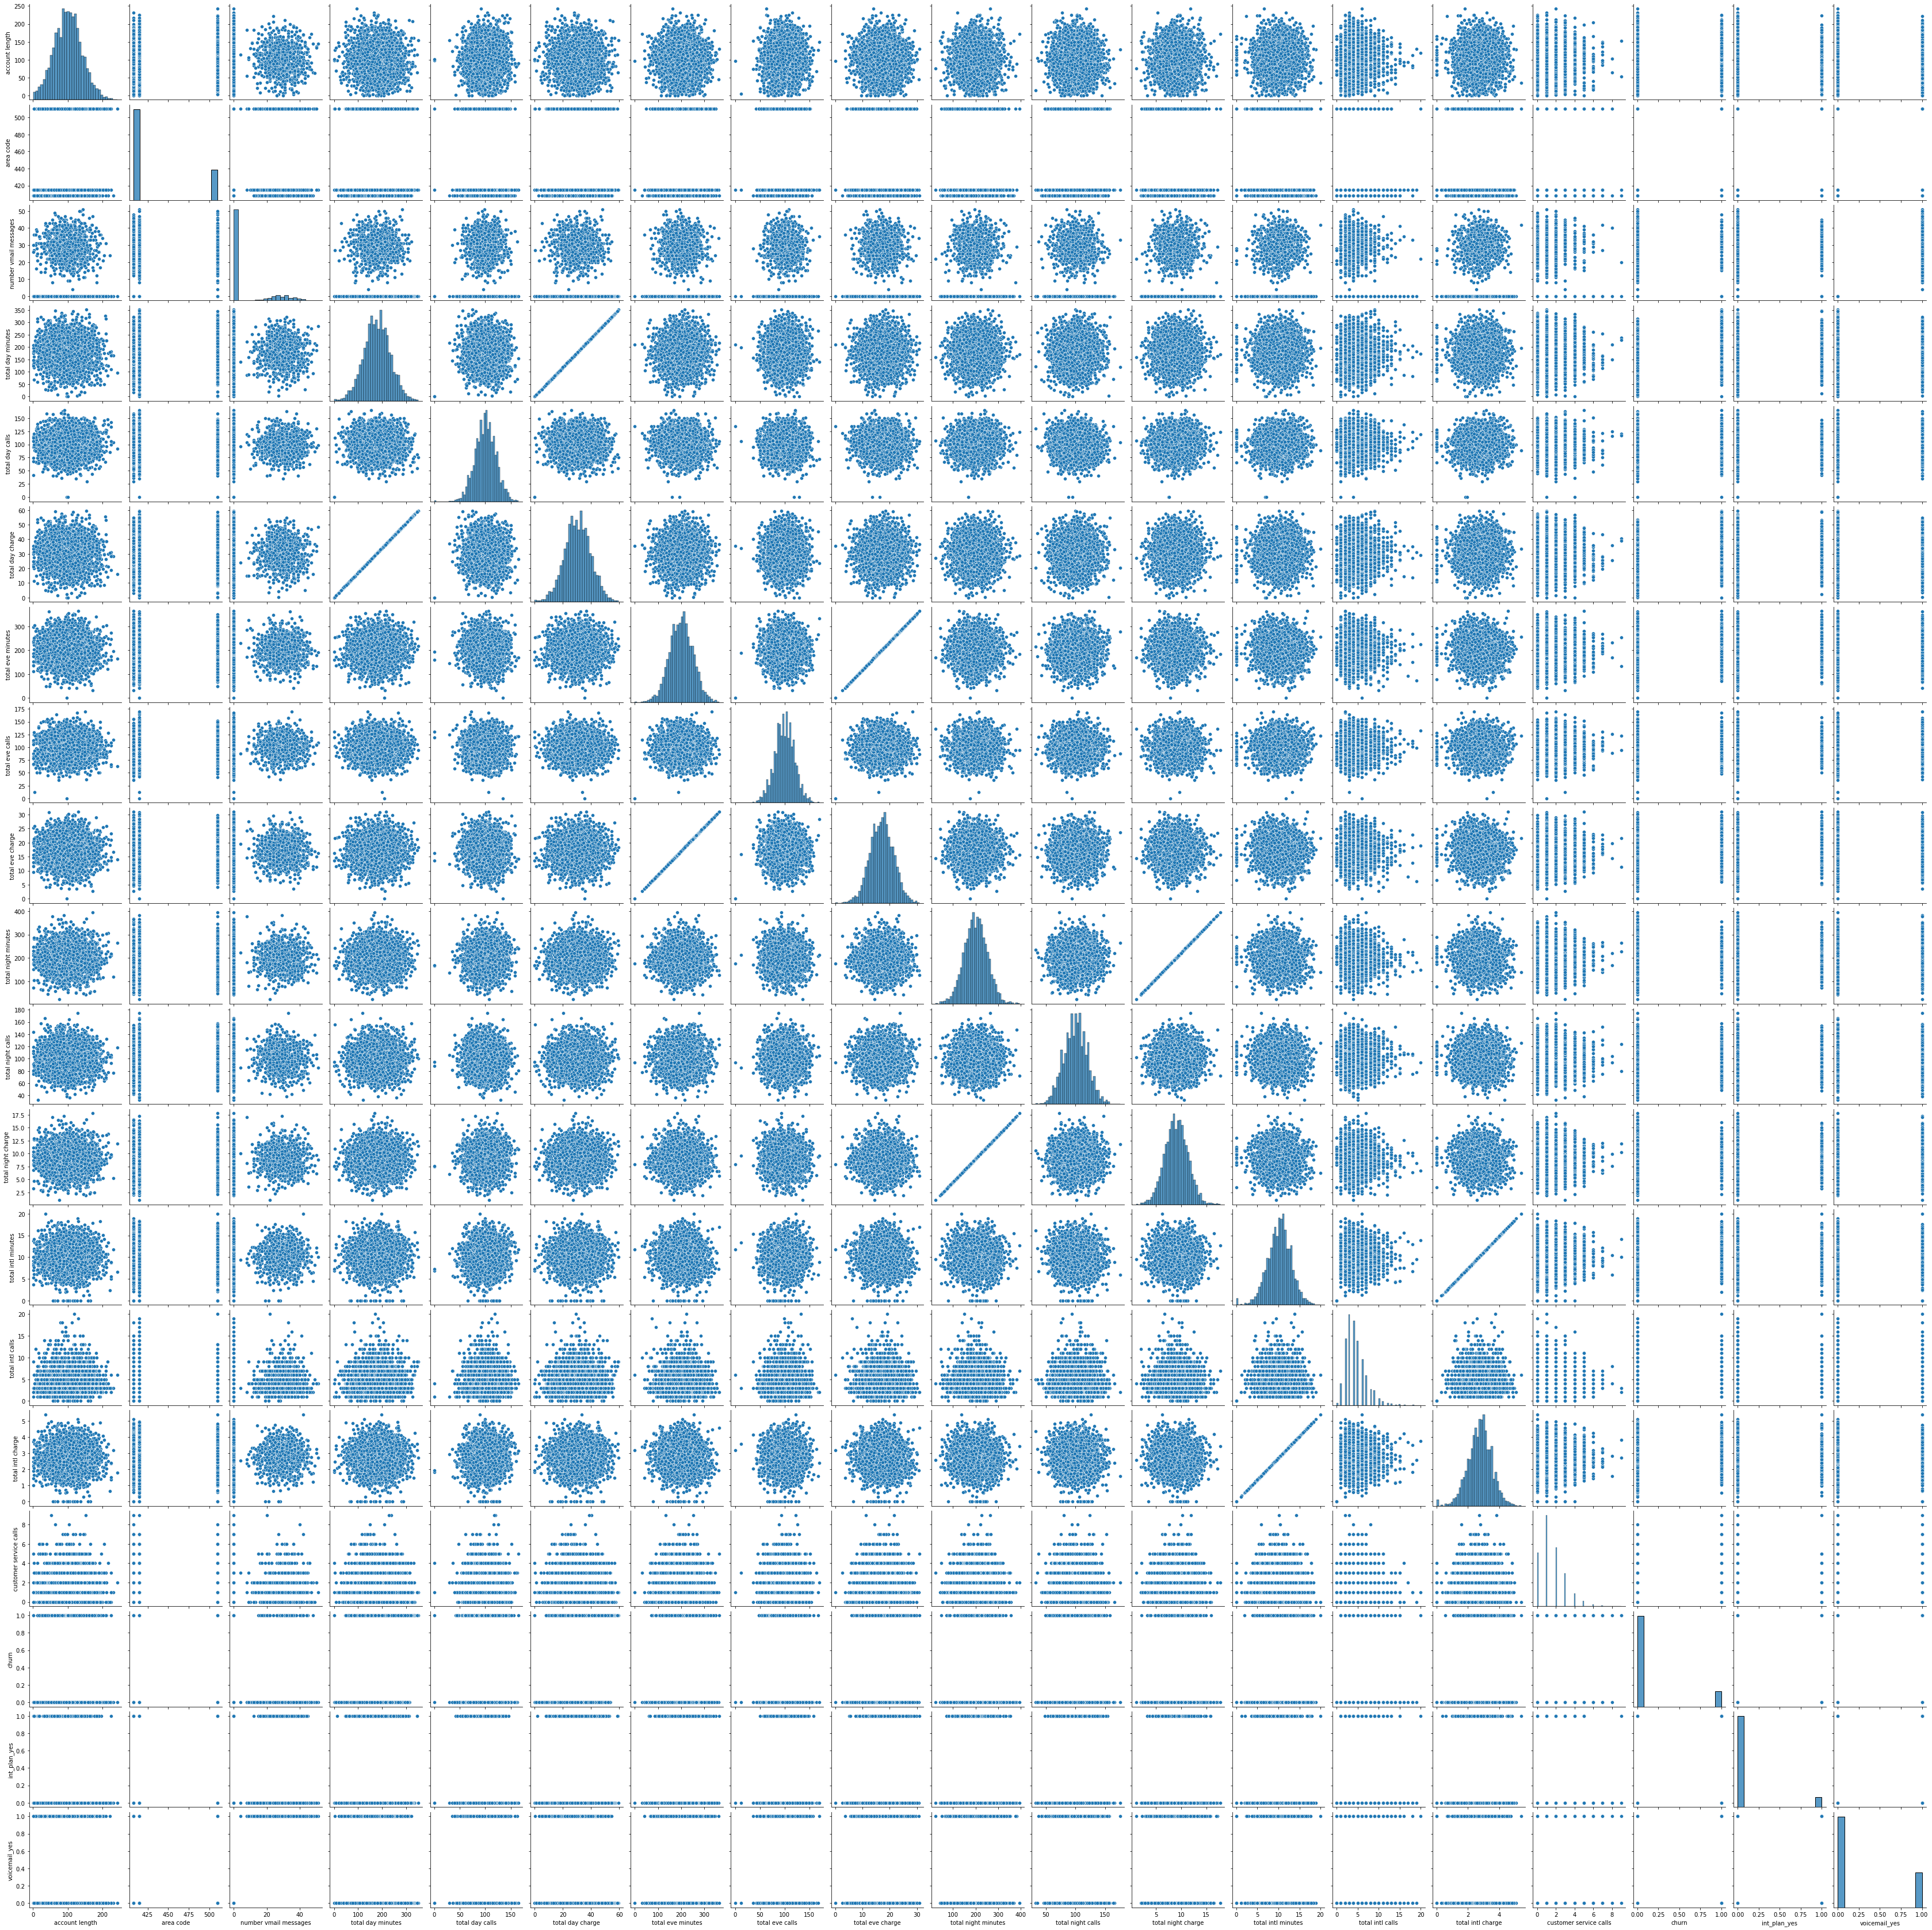

In [13]:
sns.pairplot(df_final)

<AxesSubplot:>

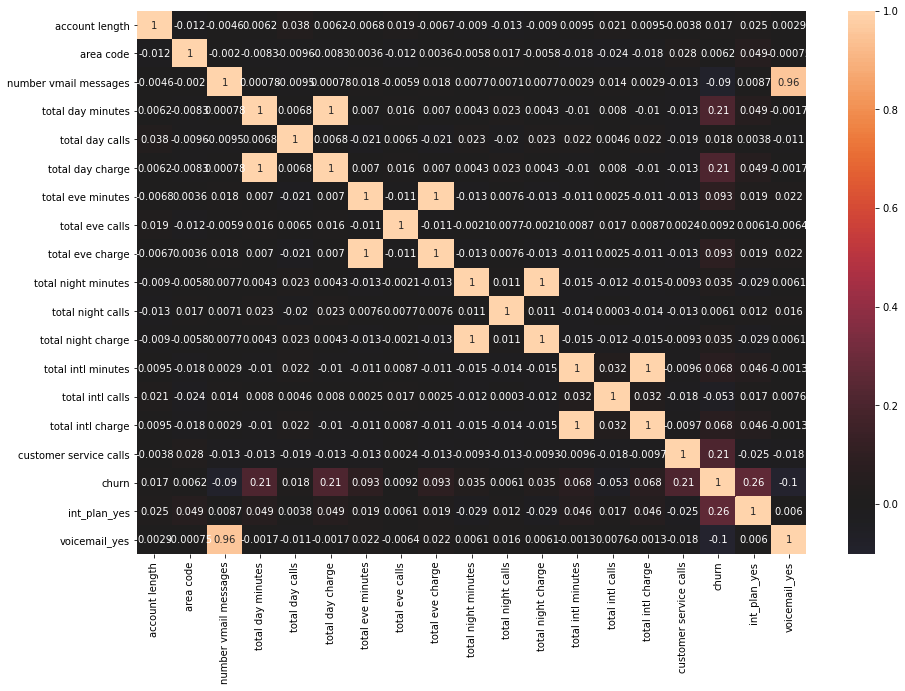

In [14]:
feats = ['account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls','churn','int_plan_yes','voicemail_yes']
corr = df_final[feats].corr()

_, ax= plt.subplots(figsize=(15,10))
sns.heatmap(corr, center=0, annot=True, ax=ax)

<AxesSubplot:>

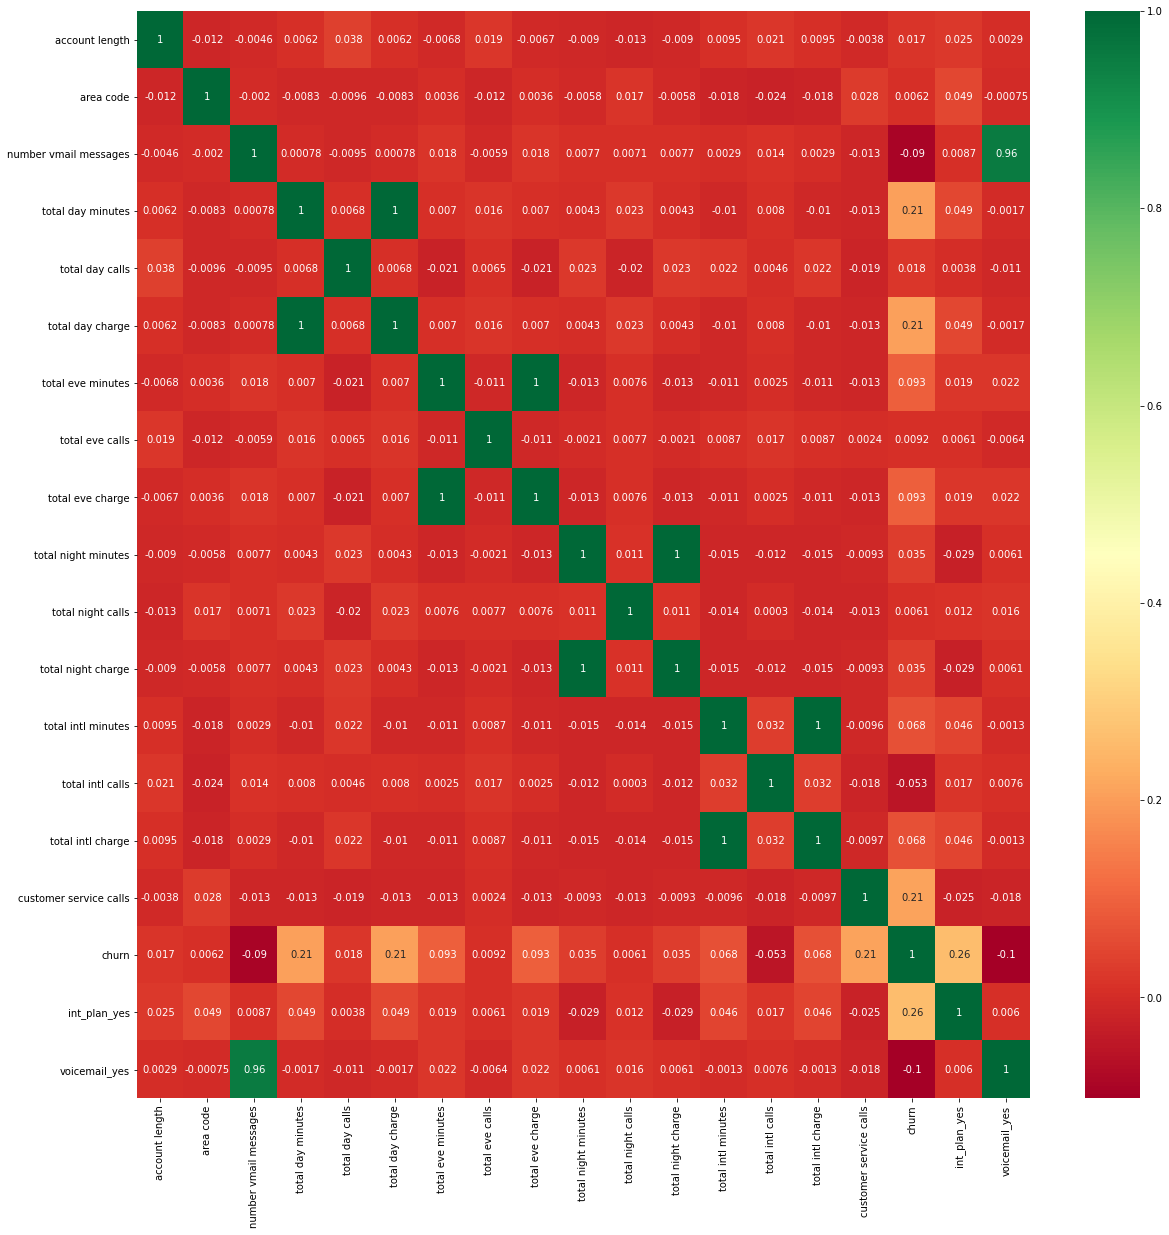

In [15]:
corrmat = df_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df_final[top_corr_features].corr(), annot=True, cmap='RdYlGn')


In [16]:
df_final.head()

account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total eve charge  total night minutes  total night calls  \
0             16.78                244.7                 91   
1             16.62                254.4                103   
2             10.30                162.6                104   
3              5.26                196.9                 89   
4             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  int_plan_yes  \
0               2.70                       1  False             0   
1               3.70                       1  False             0   
2               3.29                       0  False             0   
3               1.78                       2  False             1   
4               2.73                       3  False             1   

   voicemail_yes  
0              1  
1              1  
2              0  
3              0  
4              0

## Modeling 

Building Classification Model using Random Forest
#Yayy,  past monique know whats up 

In [17]:
#Getting the Target and Features from the DataFrame 
X = df_final.iloc[:, [0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,17,18]]
y = df_final.iloc[:,16].values

In [18]:
X.head()

account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  int_plan_yes  voicemail_yes  
0                       1             0              1  
1                       1             0              1  
2                       0             0              0  
3                       2             1              0  
4                       3             1              0

In [19]:
y

array([False, False, False, ..., False, False, False])

In [20]:
#Split the Data: Training & Testing 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)


In [21]:
#Standardizing the Dataset 
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
print(X_train)

     state  account length  area code  number vmail messages  \
3019    TX             169        408                      0   
1735    CO             119        408                      0   
1823    AR             116        415                     23   
453     LA             149        415                     20   
648     WI             131        415                     39   
...    ...             ...        ...                    ...   
3290    CA             127        510                      0   
2972    MT             147        415                     35   
3295    TN             110        415                      0   
271     OK             117        415                      0   
2522    TN             106        415                      0   

      total day minutes  total day calls  total day charge  total eve minutes  \
3019              266.7              105             45.34              158.2   
1735              124.3               68             21.13           

In [22]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesRegressor 
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.02468872 0.01594437 0.01223916 0.12090748 0.02537888 0.13702531
 0.12077625 0.02214284 0.03566552 0.02461594 0.03637708 0.04994172
 0.08540071 0.04865168 0.13047918 0.06883656 0.04092861]


## Random Forest Classifier 

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[569   7]
 [ 25  66]]
0.952023988005997


Pickled the model to save for future use 

In [31]:
#Pickled The Model 
import pickle 
file = open('churn_dataset.csv','wb')
pickle.dump(rf,file)

# Evaluation 


## Conclusion

## Next Steps 